# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수,
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [1]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [20]:
from google.colab import files
uploaded = files.upload()

Saving product_sales.csv to product_sales (1).csv


In [21]:
sales = pd.read_csv("product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [22]:
print(sales.shape)
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [23]:
#모델 생성
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [24]:
kmeans.fit(sales)
pred = kmeans.predict(sales)

2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [25]:
scale = sales.copy()
scale['cluster'] = pred
sales['cluster'] = pred

## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [26]:
salesDF = sales.drop('cluster', axis=1)

3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [27]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(salesDF)

#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x'] = pca_result[:,0]
sales['pca_y'] = pca_result[:,1]

print(sales[['pca_x', 'pca_y']].head())

      pca_x     pca_y
0 -2.516330 -0.074159
1 -2.466679  0.231335
2 -2.557365  0.456400
3 -2.615332  0.073586
4 -2.636320 -0.087265


3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

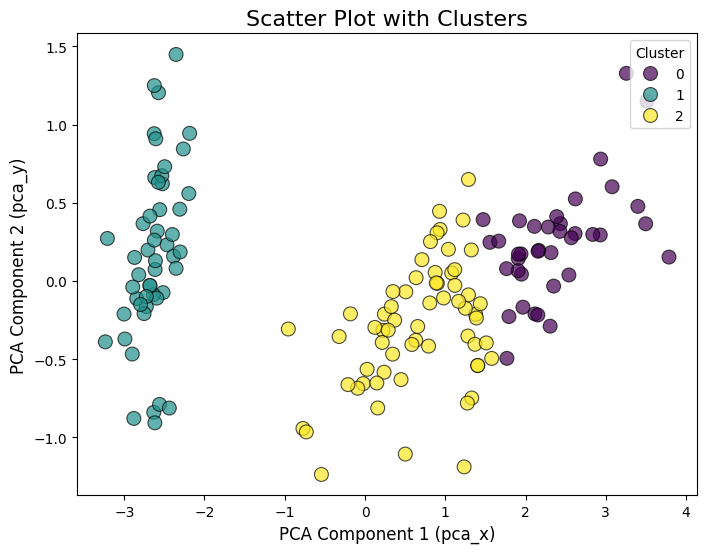

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', palette='viridis', data=sales, s=100, edgecolor='k', alpha=0.7)

plt.title('Scatter Plot with Clusters', fontsize=16)
plt.xlabel('PCA Component 1 (pca_x)', fontsize=12)
plt.ylabel('PCA Component 2 (pca_y)', fontsize=12)
plt.legend(title='Cluster', loc='upper right')

# 그래프 출력
plt.show()

## 4) 군집평가: 실루엣 계수 구하기

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [30]:
#sales의 모든 데이터에 실루엣 계수 구하기
from sklearn.metrics import silhouette_samples
import numpy as np

labels = sales['cluster']  # 군집 라벨

# 실루엣 계수 계산
silhouette_vals = silhouette_samples(sales[['pca_x', 'pca_y']], labels)

In [34]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

In [36]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette_score'] = silhouette_vals
# 결과 확인
print(sales[['cluster', 'silhouette_score']].head())

   cluster  silhouette_score
0        1          0.823335
1        1          0.832527
2        1          0.828828
3        1          0.846510
4        1          0.835783


4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [32]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
average_silhouette_score = np.mean(silhouette_vals)

# 결과 출력
print("Average Silhouette Score:", average_silhouette_score)

Average Silhouette Score: 0.5883870250394265


4-3) 군집별 평균 실루엣 계수를 구하세요.

In [33]:
#군집별 평균 실루엣 계수 구하기
average_silhouette_per_cluster = sales.groupby('cluster')['silhouette_score'].mean()

# 결과 출력
print(average_silhouette_per_cluster)

cluster
0    0.540395
1    0.788918
2    0.456083
Name: silhouette_score, dtype: float64
